In [1]:
from pyproj import Transformer
from ipyleaflet import Map, ImageOverlay
from ipywidgets import Layout
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import rasterio

In [16]:
sar_name = 'S1A_IW_GRDH_1SSV_20161118T133343_20161118T133408_013997_0168E2_0E34'
sar_date = '20161118'

In [2]:
with rasterio.open('../../data/lidar-mask.tif') as src:
    water_array = src.read(1)
with rasterio.open('../../data/gee/imagery/sentinel-1/'+sar_name+'.tif') as src:
    sar_array = src.read(1)
    bounds = src.bounds
    sar_crs = src.crs.to_string()

In [4]:
sar_crs

'EPSG:6341'

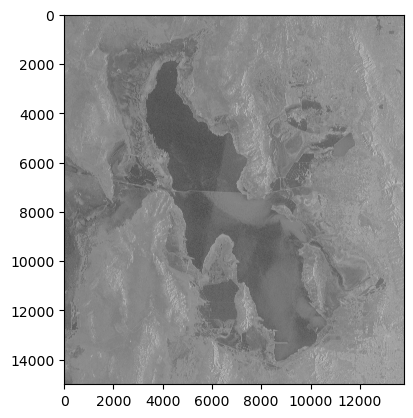

In [12]:
plt.imshow(sar_array, cmap='gray')
plt.show()

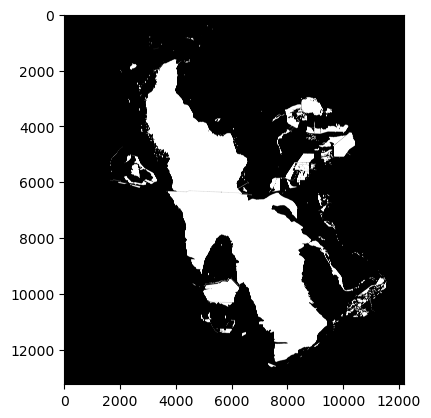

In [34]:
plt.imshow(water_array, cmap='gray')
plt.show()

In [3]:
# Create a transformer from the CRS of the GeoTIFF to EPSG:4326
transformer = Transformer.from_crs(sar_crs, "EPSG:4326")

# Get the bounds in the original CRS
west, south, east, north = bounds

# Transform the bounds to EPSG:4326
south, west = transformer.transform(west, south)
north, east = transformer.transform(east, north)
center = [(north + south) / 2, (west + east) / 2]

In [7]:
cmap_water = plt.get_cmap('Blues')  # colormap for the water mask
colors = [(0, 0, 0, 0), (0, 0, 1, 1)]  # RGBA colors: (red, green, blue, alpha), alpha=0 for transparent
cmap_water = ListedColormap(colors)
water_image = cmap_water(water_array)
plt.imsave('../../data/temp/water_image.png', water_image)

In [104]:
# scale sar array to 0-1
# sar_array = (sar_array - sar_array.min()) / (sar_array.max() - sar_array.min())

In [4]:
# Create color maps
cmap_sar = plt.get_cmap('gray') 
sar_image = cmap_sar(sar_array)
plt.imsave('../../data/temp/'+sar_name+'.png', sar_image)

In [14]:
m = Map(center=center, zoom=10, layout=Layout(height='850px'))

sar_overlay = ImageOverlay(url='../../data/temp/'+sar_name+'.png', bounds=((south, west), (north, east)))
water_overlay = ImageOverlay(url='../../data/temp/water_image.png', bounds=((south, west), (north, east)), opacity = .25)

m.add_layer(sar_overlay)
m.add_layer(water_overlay)

In [15]:
m.save('../../data/temp/compare-mask-and-'+sar_date+'.html')